# Importation

In [1]:
import pandas as pd
import numpy as np
import datetime, time
import json
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("summaryOnlyTrue.csv", index_col=0)
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d', errors='ignore')
df

,Name,Symbol,Date,Watching,Rate,Price,Volume,FullyDilluted,CirculatingSupply
1,Bitcoin,BTC,2013-04-28,1870458,6.195538,11494.872689,9.975310e+09,1.928424e+11,1.677416e+07
2,Litecoin,LTC,2013-04-28,549972,1.988881,175.530034,9.753236e+08,9.595128e+09,8.094137e+05
3,Namecoin,NMC,2013-04-28,3326,0.916970,3.150424,6.527672e+05,4.642591e+07,3.979403e+03
4,Terracoin,TRC,2013-04-28,1428,0.198836,0.235587,2.426486e+04,5.173975e+06,4.613477e+02
5,Peercoin,PPC,2013-04-28,7095,0.498030,3.879527,2.271262e+06,9.526095e+07,8.151842e+03
...,...,...,...,...,...,...,...,...,...
2808,Singapore Dollar,SGD,2013-04-28,0,1.012762,0.748482,0.000000e+00,0.000000e+00,0.000000e+00
2809,Thai Baht,THB,2013-04-28,0,1.049484,0.031020,0.000000e+00,0.000000e+00,0.000000e+00
2810,Turkish Lira,TRY,2013-04-28,0,0.613378,0.261814,0.000000e+00,0.000000e+00,0.000000e+00
2811,New Taiwan Dollar,TWD,2013-04-28,0,1.076093,0.033699,0.000000e+00,0.000000e+00,0.000000e+00


# Analyse

In [3]:
df.FullyDilluted.mean()

550948954.0412153

In [26]:
df[((10 < df.Rate) & (df.Rate < 100))]

,Name,Symbol,Date,Watching,Rate,Price,Volume,FullyDilluted,CirculatingSupply
16,WorldCoin,WDC,2013-05-22,451,10.281044,0.029690,1.997910e+04,3.494355e+06,287.303238
74,Dogecoin,DOGE,2013-12-15,1037802,44.686085,0.005549,3.869913e+07,6.255987e+08,52234.893361
154,Marscoin,MARS,2014-02-24,2577,16.600464,0.014044,5.137633e+03,3.971528e+05,33.733884
268,WhiteCoin,XWC,2014-04-18,14844,12.526823,0.144483,1.025192e+06,3.592128e+07,3003.911958
584,NativeCoin,N8V,2014-09-06,1289,22.500071,0.008425,4.535786e+03,0.000000e+00,0.000000
1403,FirstBlood,1ST,2016-09-28,2183,11.799084,0.695633,4.283204e+06,5.951726e+07,5023.126202
1465,Veros,VRS,2016-11-29,1822,67.131408,0.000094,2.649984e+04,4.585098e+04,3.959408
1839,Binance Coin,BNB,2017-07-25,796234,24.808212,7.771796,8.214284e+07,7.695166e+08,66507.090773
1843,EmberCoin,EMB,2017-07-27,588,19.393365,0.000023,2.355333e+05,1.678820e+06,123.501352
1975,Chainlink,LINK,2017-09-20,593668,82.751887,0.502206,8.382886e+06,1.757721e+08,15237.236018


Text(0.5, 0, '10^x')

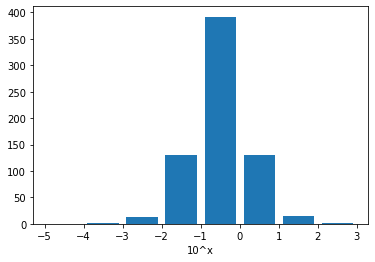

In [17]:
count = []
for i in range(-4, 4):
    if i == -4:
        start = 0
        end = 10**i
    else:
        start = 10**(i-1)
        end = 10**i
        
    df_ = df[((start < df.Rate) & (df.Rate < end))]
    df__ = df_[df_.FullyDilluted > 0]
    count.append(len(df__))
    
plt.bar((np.linspace(-5, 2, 8) + 0.5), count)
plt.xlabel("10^x")

In [18]:
df[((0.1 < df.Rate) & (df.Rate < 1))].count()

Name                 459
Symbol               459
Date                 459
Watching             459
Rate                 459
Price                459
Volume               459
FullyDilluted        459
CirculatingSupply    459
dtype: int64